# 0. Introduction
This notebook will examine the hypothetical return of value investing vs growth investing. In order to make such comparison, three mutual funds from vanguard were studied:
<br>
VVIAX: Vanguard Value Index Fund Admiral Shares
<br>
VIGAX: Vanguard Growth Index Fund Admiral Shares
<br>
VFIAX: Vanguard 500 Index Fund Admiral Shares
<br>
<br>
The adjusted return data for these three mutual funds are extracted using Yahoo Finance. The cumulative return vs. purchase date were calculated. The earliest purchase date available is November 2017.

In [20]:
# import libraries
import numpy as np  
import pandas as pd
import yfinance as yf
from datetime import date


# 1. Prepare Helper function

In [21]:
def load_symbol(symbol_list, period = "5y"):
    """ Given a stock symbol and period of interest, load data from yahoo finance and return a panda dataframe """

    # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max

    # example input: symbol = ["SPY", "APPL"] period = "5y"
    # will download data for SPY and Apple for the past 5 year from today

    try: 
        DF = yf.download(symbol_list, period = period)
        return (DF)
    except:
        print ("Failure parsing Yahoo Finance Data")
    
def select_adjclose_column (DF):
    """given a yahoo finance dataframe, select the adjusted close column"""

    return (DF["Adj Close"])


def fill_missing_values (DF):
    """ given a yahoo finance dataframe
    in case there are missing values, foward fill first followed by back fill """
    DF = DF.fillna(method = "ffill")
    DF = DF.fillna(method = "bfill")
    return (DF)


def compute_total_return_by_day (DF):
    """
    given a yahoo finance dataframe, compute the investment return from the start date until today

    Parameter:
    DF: A yahoo finance dataframe
    

    Return:
    A panda dataframe containing the cumulative return. Each row means return if buying at that particular date
    """
    return ((DF.iloc[-1]/DF-1.0)[:-1])


# 2. Load and Clean Data

In [22]:
symbol_list = ["VVIAX", "VIGAX", "VFIAX"]
note_list = ["Value", "Growth", "S&P 500"] # add additional notation for clearity
dictionary = dict(zip(symbol_list, note_list))

#print today's date
today = str(date.today())
print ("Today's date is ", today)


# load the three mutual fund.
DF = load_symbol(symbol_list, period = "max")

# select adjusted close and fill missing values
DF = fill_missing_values(select_adjclose_column(DF))


Today's date is  2019-08-27
[*********************100%***********************]  3 of 3 downloaded


# 3. Compute return and plotting
The daily cumulative return is compared and plotted

Loading BokehJS ...

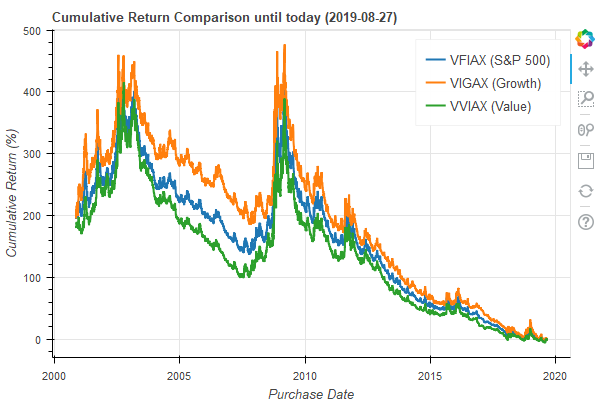

In [23]:

# compute cumulative return
DF1 = compute_total_return_by_day(DF)

# plotting
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
from bokeh.models import LinearAxis, Range1d
from bokeh.io import export_png
from bokeh.palettes import Category10_10 as palette
import itertools

# display plot inline in notebook
output_notebook()


def plot_return (DF, note_dict = None, legend_position = "top_right"):
    #initialize today's date
    today = str(date.today())

    # create a color cycle for automatic color assignment
    colors = itertools.cycle(palette) 

    p = figure(x_axis_label = "Purchase Date",x_axis_type='datetime', y_axis_label = "Cumulative Return (%)", plot_width=600, plot_height=400, title="Cumulative Return Comparison until today (" + today + ")")

    for ticker in DF.columns:
        if (note_dict == None):
            for ticker in DF.columns:

                p.line(DF.index, DF[ticker]*100, line_width=2, legend = ticker, color = next(colors))
        else: # add additional notation
            p.line(DF.index, DF[ticker]*100, line_width=2, legend = str(ticker + " (" + note_dict[ticker] + ")"), color = next(colors))


    p.legend.location= legend_position
    
    return (p)

p = plot_return (DF1, note_dict = dictionary)
show (p)

# export to png
try:
    export_png(p, filename="Fig 2.1.PNG")
except:
    pass

#work around because Bokeh will not load when uploaded as a Jupyter Notebook on Github

%matplotlib inline
from IPython.display import Image
try:
    display(Image(filename = "Fig 2.1.PNG"))
except:
    pass


# 4. Summary
The above plot shows the purcahse date on x axis, and the cumulative return till today. The value index, growth index, and the SPY500 index are highly correlated.
<br>
Several conclusion can be drawn from the plot.
<br>
1. If one buys mutual fund during recession and hold until now, the return is extremly high. So buy when people are in fear.
<br>
2. The return data is calcuated from adjusted return, which is adjusted for stock split, dividend payment, etc. Even though the Value Fund pays slightly more dividend than the Growth Fund, the Growth Fund still constantly provide better return.

# 5. Analysis of additional funds
There are other popular investing strategies in additional to value and growth investing. These includes real estate(VGSLX), high yield(VHDYX), dividend appreciation (VDAIX). This section will perform the same analysis but includes more mutual fund.

[*********************100%***********************]  6 of 6 downloaded


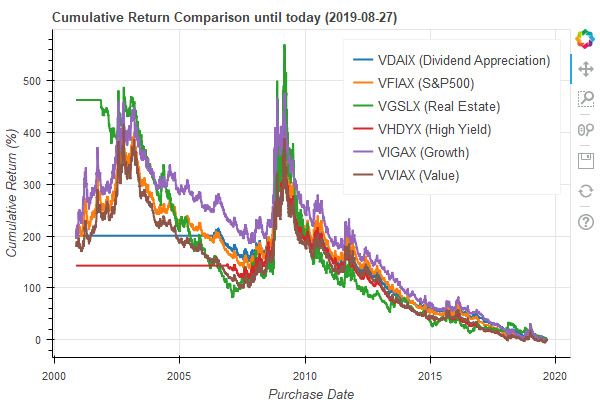

In [24]:

symbol_list2 = ["VFIAX", "VGSLX", "VHDYX", "VDAIX","VIGAX","VVIAX"]
note_list2 = ["S&P500", "Real Estate", "High Yield", "Dividend Appreciation","Growth", "Value"] # add additional notation for clearity

dictionary2 = dict(zip(symbol_list2, note_list2 ))



# load the three mutual fund.
DF2 = load_symbol(symbol_list2, period = "max")

# select adjusted close and fill missing values
DF2 = fill_missing_values(select_adjclose_column(DF2))

DF3 = compute_total_return_by_day(DF2)

p1 = plot_return (DF3, note_dict = dictionary2)
show (p1)

# export to png
try:
    export_png(p1, filename="Fig 2.2.PNG")
except:
    pass
#work around because Bokeh will not load when uploaded as a Jupyter Notebook on Github
try:
    display(Image(filename = "Fig 2.2.PNG"))
except:
    pass




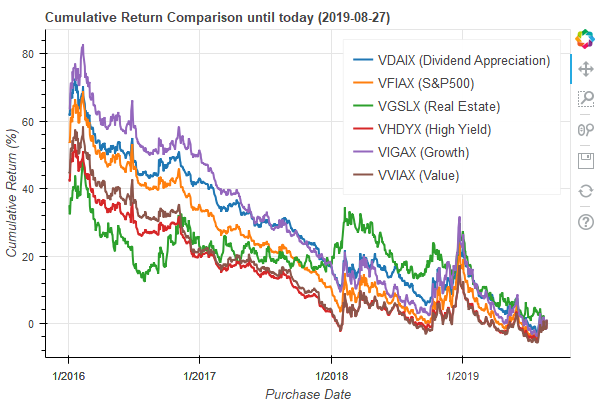

In [25]:

# zoom in from 2016

p2 = plot_return (DF3.loc["2016-01-01":today], note_dict = dictionary2)
show (p2)

try:
    export_png(p2, filename="Fig 2.3.PNG")
except:
    pass
#work around because Bokeh will not load when uploaded as a Jupyter Notebook on Github
try:
    display(Image(filename = "Fig 2.3.PNG"))
except:
    pass



# 5.1 Summary of Analysis of additional funds
Even though the graph become a little clutter, it can be seened that the Growth Fund is still the best performer  and almost consistently beat the S&P 500 index.
<br>
Since Mid 2014, the dividend appreciation strategy (VDAIX) starst to beat the S&P 500, and the real estate (VGSLX) starts outperforming S&P 500 and even the Growth Fund since 2018.
<br>
It is important to realize that the analysis outlined in this notebook did not considered reinvesting dividends. Since Dividend Appreciation and Real Estate pays much higher dividend then S&P 500, with dividend reinvested, these two stragties actually have higher return then the plot indicates.